## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [2]:
df = pd.read_csv('data/toyota.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


## 1. Data Understanding

In [3]:
# untuk melihat jenis model mobil toyota apa saja yang ada
df['model'].unique()

array([' GT86', ' Corolla', ' RAV4', ' Yaris', ' Auris', ' Aygo', ' C-HR',
       ' Prius', ' Avensis', ' Verso', ' Hilux', ' PROACE VERSO',
       ' Land Cruiser', ' Supra', ' Camry', ' Verso-S', ' IQ',
       ' Urban Cruiser'], dtype=object)

In [4]:
# untuk melihat tipe data apa saja yang ada dalam data, kita hanya akan menggunakan tipedata berbentuk angka, sehingga yang lain akan dilakukan label encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [5]:
df.shape

(6738, 9)

## 2. Cleaning Data

In [6]:
# melihat apakah ada data yang kosong
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [7]:
# melihat apakah ada data duplicate
df.duplicated().sum()

39

In [8]:
# karena ada data yang terduplikasi, maka kita akan menghapusnya
df = df.drop_duplicates()

In [9]:
# melihat jumlah baris data setelah dicleaning
df.shape

(6699, 9)

## 3. Expoloratory Data Analysis (EDA)

In [10]:
print(df.dtypes)


model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object


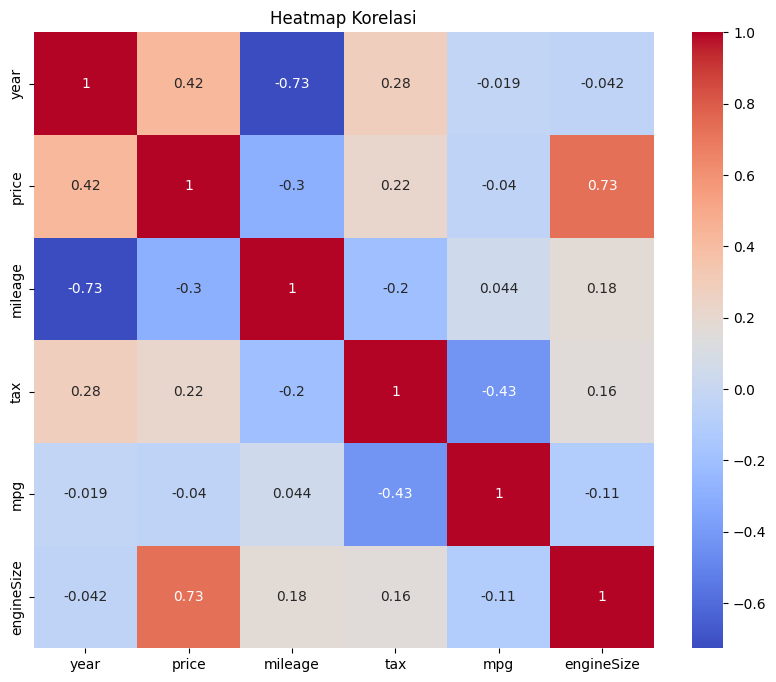

In [11]:
# Memilih hanya kolom numerik dari dataframe
numeric_df = df.select_dtypes(include=[np.number])

# Membuat kanvas untuk visualisasi dengan ukuran 10x8
plt.figure(figsize=(10, 8))

# Membuat heatmap untuk menampilkan matriks korelasi antara kolom numerik
# annot=True menambahkan nilai korelasi ke dalam setiap sel heatmap
# cmap='coolwarm' memberikan skema warna yang membantu membedakan nilai korelasi positif dan negatif
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

# Menambahkan judul pada heatmap
plt.title('Heatmap Korelasi')

# Menampilkan heatmap ke layar
plt.show()


jika korelasi bernilai 1 atau mendekati 1 maka korelasi dari atribut tersebut =bernilai baik dan bisa dilanjutkan untuk proses berikutnya, namun jika korelasinya bernilai negatif maka korelasi dari atribut tersebut tidak baik atau tidak ada kaitan

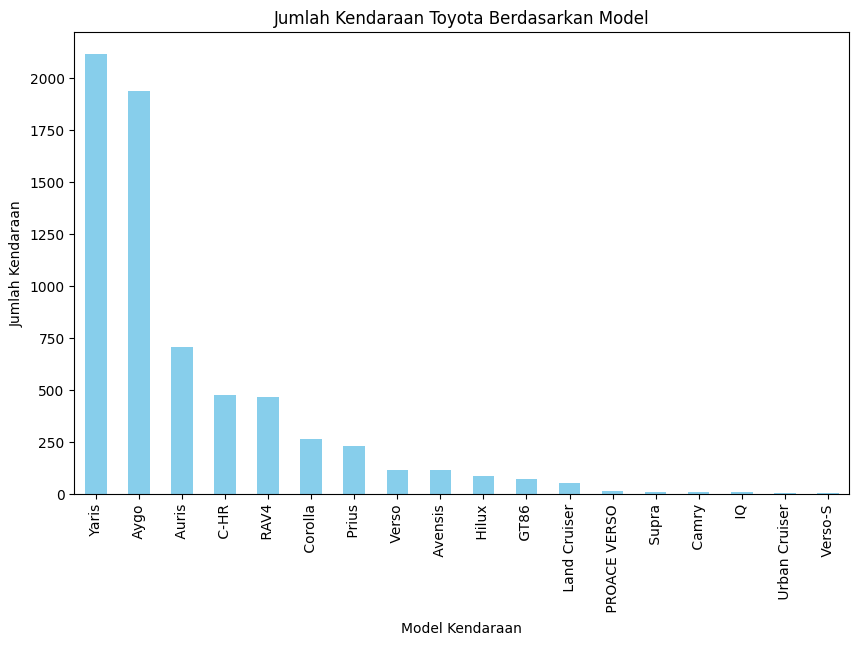

In [12]:
# melihat jenis kendaraan toyota apa yang paling banyak :
jumlah_kendaraan = df['model'].value_counts()

plt.figure(figsize=(10, 6))
jumlah_kendaraan.plot(kind='bar', color='skyblue')
plt.xlabel('Model Kendaraan')
plt.ylabel('Jumlah Kendaraan')
plt.title('Jumlah Kendaraan Toyota Berdasarkan Model')
plt.show()

<Figure size 1000x600 with 0 Axes>

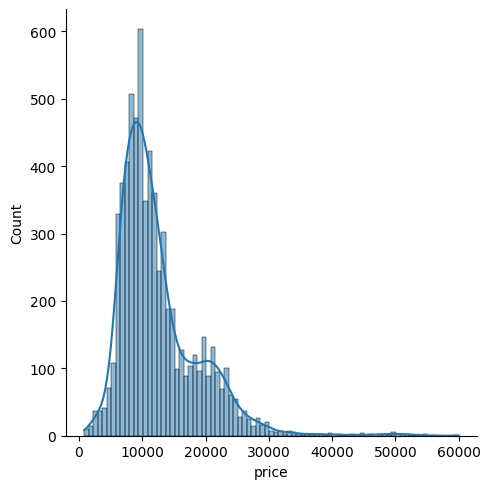

In [13]:
# Visualisasi terhadap harga penjualan dari tiap tiap mobil

plt.figure(figsize=(10, 6))
sns.displot(df['price'], kde=True)

In [14]:
# mengubah mata uang euro menjadi rupiah (06 Desember 2024, 1 euro = 16735 rupiah)

nilai_tukar_euro_ke_rupiah = 16735

df['price'] = df['price'] * nilai_tukar_euro_ke_rupiah
df['tax'] = df['tax'] * nilai_tukar_euro_ke_rupiah

C:\Users\LEGION SLIM 7\AppData\Local\Temp\ipykernel_27336\2383604972.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'] * nilai_tukar_euro_ke_rupiah
C:\Users\LEGION SLIM 7\AppData\Local\Temp\ipykernel_27336\2383604972.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tax'] = df['tax'] * nilai_tukar_euro_ke_rupiah


In [18]:
df.sample(5)
# df[df['mileage'] == 11424]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
3399,Auris,2016,162613995,Manual,31280,Petrol,502050,58.9,1.2
4057,Aygo,2016,125428825,Manual,9601,Petrol,0,69.0,1.0
3053,Auris,2016,217521530,Automatic,46162,Hybrid,0,78.5,1.8
6604,Hilux,2018,322952030,Manual,24775,Diesel,4351100,40.4,2.4
186,Corolla,2019,392352075,Automatic,5558,Hybrid,2259225,78.5,1.8


## 4. Label Encoder

Kegunaan label endoder adalah untuk mengubah data yang memiliki tipedata object menjadi tipedata angka

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6699 non-null   object 
 1   year          6699 non-null   int64  
 2   price         6699 non-null   int64  
 3   transmission  6699 non-null   object 
 4   mileage       6699 non-null   int64  
 5   fuelType      6699 non-null   object 
 6   tax           6699 non-null   int64  
 7   mpg           6699 non-null   float64
 8   engineSize    6699 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 523.4+ KB


di sini terlihat ada 3 atribut yang memiliki tipedata object, kita akan ubah menjadi angka

In [20]:
from sklearn.preprocessing import LabelEncoder

# m, t, dan f adalah model, transmission, dan fueltype
m_endoder = LabelEncoder()
t_endoder = LabelEncoder()
f_endoder = LabelEncoder()

# Melakukan label encoding pada kolom-kolom yang memiliki tipe data string
df['model'] = m_endoder.fit_transform(df['model'])
df['transmission'] = t_endoder.fit_transform(df['transmission'])
df['fuelType'] = f_endoder.fit_transform(df['fuelType'])

C:\Users\LEGION SLIM 7\AppData\Local\Temp\ipykernel_27336\2532846835.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model'] = m_endoder.fit_transform(df['model'])
C:\Users\LEGION SLIM 7\AppData\Local\Temp\ipykernel_27336\2532846835.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transmission'] = t_endoder.fit_transform(df['transmission'])
C:\Users\LEGION SLIM 7\AppData\Local\Temp\ipykernel_27336\2532846835.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [22]:
# Melihat label encoding yang telah dilakukan
df.sample(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
632,12,2020,610827500,0,1114,1,2259225,49.6,2.5
3498,0,2015,225905765,0,55715,1,0,70.6,1.8
2917,17,2011,100242650,1,38000,3,2091875,51.4,1.3
5826,3,2019,490335500,0,3060,1,2259225,54.3,2.0
371,12,2014,184051530,1,50709,0,2510250,53.0,2.0


## 5. Preparation Data

Tahapan ini digunakan untuk memisahkan antara dataTrain(x) dan juga dataTesting(y)

In [ ]:
# Menentukan daftar fitur (independent variables) yang akan digunakan sebagai input untuk model prediksi
features = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']

# Mengambil kolom-kolom dari DataFrame sesuai dengan daftar fitur untuk digunakan sebagai X (input)
x = df[features]

# Mengambil kolom target ('price') dari DataFrame untuk digunakan sebagai Y (output/label)
y = df['price']

# Mengecek bentuk (dimensi) dari X dan Y
x.shape, y.shape


((6699, 8), (6699,))

In [26]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi data latih dan data uji.
# Data input (x) dan target (y) dipisahkan berdasarkan proporsi test_size=0.2.
# 80% data digunakan untuk pelatihan, dan 20% untuk pengujian.
# Parameter random_state=42 digunakan agar pembagian data konsisten setiap kali kode dijalankan.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Mengecek jumlah baris pada data target pengujian (y_test).
# Bentuknya berupa tuple yang menunjukkan jumlah baris (contoh: (200,) jika 20% data uji dari 1000 baris total).
y_test.shape


(1340,)

## 6. Training & Evaluation Data

In [ ]:
# kita akan menerapkan algoritma Linear Regression

from sklearn.linear_model import LinearRegression

# Membuat objek model Linear Regression dari pustaka scikit-learn
lr = LinearRegression()

# Melatih model menggunakan data latih (X_train sebagai input, y_train sebagai target/label)
# Model akan mempelajari hubungan antara fitur (X_train) dan target (y_train)
lr.fit(X_train, y_train)

# Menggunakan model yang sudah dilatih untuk memprediksi data uji (X_test sebagai input)
# Hasil prediksi akan disimpan dalam variabel 'pred', yang berisi nilai-nilai harga mobil hasil prediksi
pred = lr.predict(X_test)


In [33]:
# Menghitung skor akurasi model menggunakan data uji
# Metode .score() mengevaluasi model dengan menghitung koefisien determinasi (R^2 score)
# Inputnya adalah X_test (fitur data uji) dan y_test (target sebenarnya dari data uji)
score = lr.score(X_test, y_test)

# Menampilkan skor akurasi model dalam bentuk persentase R^2 score
# Semakin tinggi nilai R^2 (maksimal 1), semakin baik model memprediksi data uji
print(f"Akurasi model Regresi Linear Berganda Adalah:", score)


Akurasi model Regresi Linear Berganda Adalah: 0.7909694669635874


In [35]:
# Evaluasi untuk melihat hasil pelatihan data kita

from sklearn import metrics

# Menghitung Mean Absolute Error (MAE)
# MAE adalah rata-rata kesalahan absolut antara nilai prediksi (pred) dan nilai sebenarnya (y_test).
# Nilai MAE lebih kecil menunjukkan model lebih akurat.
print('MAE:', metrics.mean_absolute_error(y_test, pred))

# Menghitung Mean Squared Error (MSE)
# MSE adalah rata-rata kuadrat dari kesalahan antara nilai prediksi dan nilai sebenarnya.
# MSE lebih kecil menunjukkan model lebih akurat, tetapi nilai MSE sensitif terhadap outlier.
print('MSE:', metrics.mean_squared_error(y_test, pred))

# Menghitung Root Mean Squared Error (RMSE)
# RMSE adalah akar dari MSE, memberikan ukuran kesalahan dalam skala yang sama dengan target asli (y_test).
# Nilai RMSE yang lebih kecil menunjukkan model lebih akurat.
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


MAE: 34642875.7901298
MSE: 2423503440196437.5
RMSE: 49229091.4012887


## 7. Testing

In [ ]:
# Membuat sample data
# Data ini adalah contoh input untuk memprediksi harga mobil berdasarkan fitur-fiturnya.
# Atribut "harga" tidak dimasukkan karena itu target prediksi.
# Urutan fitur harus sesuai dengan urutan kolom pada DataFrame yang digunakan untuk pelatihan model.
input_data = {
    "model": " Yaris",            # Model mobil (kategori)
    "year": 2019,                # Tahun pembuatan (numerik)
    "transmission": "Automatic", # Jenis transmisi (kategori)
    "mileage": 1401,             # Jarak tempuh (numerik)
    "fuelType": "Petrol",        # Jenis bahan bakar (kategori)
    "tax": 2345180,              # Pajak tahunan (numerik)
    "mpg": 76.3,                 # Efisiensi bahan bakar dalam mil per galon (numerik)
    "engineSize": 1.5            # Ukuran mesin (numerik)
}

# Mengubah input_data menjadi DataFrame
# DataFrame mempermudah manipulasi data untuk kompatibilitas dengan model.
input_df = pd.DataFrame([input_data])

# Melakukan label encoding pada kolom kategori
# Model, jenis transmisi, dan jenis bahan bakar harus diubah menjadi nilai numerik agar dapat diproses oleh model prediktif.
input_df['model'] = m_endoder.transform(input_df['model'])           # Encode model mobil
input_df['transmission'] = t_endoder.transform(input_df['transmission']) # Encode jenis transmisi
input_df['fuelType'] = f_endoder.transform(input_df['fuelType'])         # Encode jenis bahan bakar

# Menampilkan DataFrame yang telah di-encode
input_df

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,17,2018,0,1401,3,2345180,76.3,1.5


In [61]:
# Melakukan prediksi harga mobil dengan sample data input
prediction = lr.predict(input_df)

# Membulatkan hasil prediksi menjadi 2 angka desimal
prediction_formatted = round(prediction[0], 2)

# Menampilkan hasil prediksi
print("Estimasi Harga Mobil : Rp.", prediction_formatted)

Estimasi Harga Mobil : Rp. 246291886.98


In [59]:
# Memformat hasil prediksi menjadi format Rupiah
# Gunakan format pemisah ribuan dan desimal
prediction_rupiah = f"Rp. {prediction_formatted:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

# Menampilkan hasil prediksi
print("Estimasi Harga Mobil :", prediction_rupiah)


Estimasi Harga Mobil : Rp, 259.897.410,21
